#  Types of supervised learning
 Regression: Predict a continuous response
 Classification: Predict a categorical response

# Linear Regrssion on US Housing Price

* load the Python libraries needed for this case study and run the code below to load the Boston housing dataset.

# Import packages and dataset

In [242]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

* We are going to use the Boston House Price dataset. 

* This dataset is used in machine learning and statistics by pretty much everyone.

* The dataset contains 506  Instances 14 of Attributes 

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


In [243]:
# Load dataset
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv(filename, delim_whitespace=True, names=names)


* We are using pandas to load the data. 
* We will also use pandas next to explore the data both with descriptive statistics and data visualization.


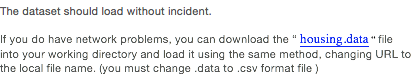

In [244]:
# Dimension and Descriptive statistics

dataset.shape

(506, 14)

In [245]:
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [246]:
# display the last 5 rows
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


# Description
**'describe()' method to get the statistical summary of the various features of the data set

In [247]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Correlation matrix 

In [248]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Feature and variable sets

In [249]:
prices = dataset['MEDV']
features = dataset.drop('MEDV', axis = 1)

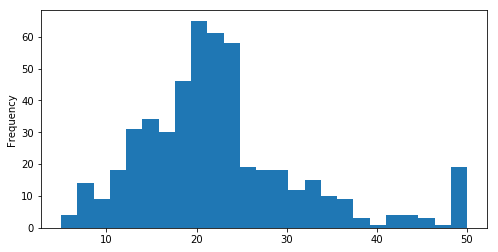

In [250]:
prices.plot.hist(bins=25,figsize=(8,4))
plt.show()

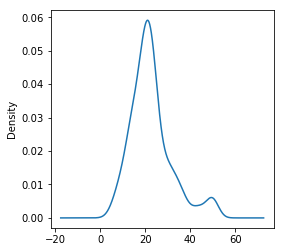

In [251]:
prices.plot.density(figsize=(4,4))
plt.show()

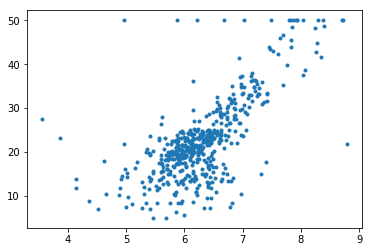

In [252]:
plt.plot(dataset['RM'],prices,'.')
plt.show()

# Developing a Model

# 1. Prepare Data: Test-train split
**Import train_test_split function from scikit-learn

In [253]:
from sklearn.cross_validation import train_test_split
# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=validation_size, random_state=seed)


## Check the size and shape of train/test splits 

In [254]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",Y_train.shape)
print("Test variable set size:",Y_test.shape)

Training feature set size: (404, 13)
Test feature set size: (102, 13)
Training variable set size: (404,)
Test variable set size: (102,)


# Model fit and training
## Import linear regression model estimator from scikit-learn and instantiate

In [255]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# model coefficients

In [256]:
print ("coefficients: %s\nintercept: %0.3f" % \
(regressor.coef_,regressor.intercept_))

coefficients: [ -1.24649091e-01   3.04735052e-02   2.17990089e-02   2.79225761e+00
  -1.52135247e+01   5.27249266e+00  -1.10577742e-02  -1.27320872e+00
   2.65804711e-01  -1.15043029e-02  -9.19571148e-01   1.01624292e-02
  -3.89712044e-01]
intercept: 23.554


# Make Predictions
# Model evaluation metrics for regression
* Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. 
* Instead, we need evaluation metrics designed for comparing continuous values.

In [257]:
# make predictions on the testing set

y_pred = regressor.predict(X_test)


* Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

* Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [258]:
# Calculate (MSE) and root-mean-square error (RMSE)
# RMSE is interpretable in the "y" units.

from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

lin_mse = mean_squared_error(y_pred, Y_test)
lin_rmse = np.sqrt(lin_mse)

print('Linear Regression MSE: %.4f' % lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression MSE: 34.0565
Linear Regression RMSE: 5.8358


In [259]:
# function to calculate MAE; MSE and RMSE
print("Mean absolute error (MAE):", metrics.mean_absolute_error(Y_test,y_pred))
print("Mean square error (MSE):", metrics.mean_squared_error(Y_test,y_pred))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

Mean absolute error (MAE): 3.78076290917
Mean square error (MSE): 34.0564813489
Root mean square error (RMSE): 5.83579312081


In [260]:
# function to calculate r-squared

print ("R2 Squared : ", r2_score(y_pred, Y_test))

R2 Squared :  0.443156217752


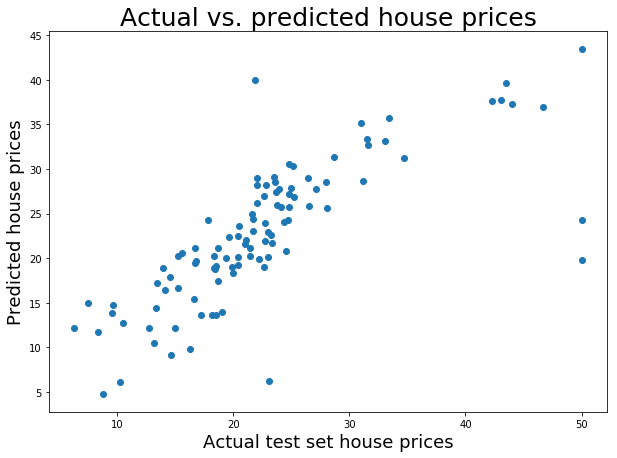

In [261]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=Y_test,y=y_pred)
plt.show()

# STATMODEL

In [262]:
import statsmodels.api as sm
# create a fitted model & print the summary
X_train = sm.add_constant(X_train)
lm = sm.OLS(Y_train, X_train).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     100.4
Date:                Sat, 20 Jan 2018   Prob (F-statistic):          1.40e-115
Time:                        18:01:25   Log-Likelihood:                -1174.7
No. Observations:                 404   AIC:                             2377.
Df Residuals:                     390   BIC:                             2433.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5542      5.656      4.164      0.0

In [263]:
# print the R-squared value for the model
lm.rsquared

0.76985329637297584

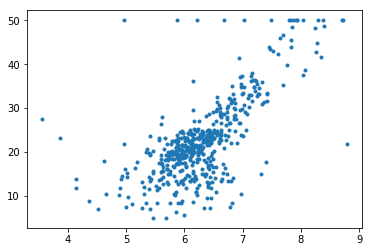

In [264]:
# 1-Feature observation:    Ref (23p157 building ….
plt.plot(dataset['RM'],prices,'.')
plt.show()

In [265]:
corr_matrix = dataset.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [266]:
RM = dataset['RM']
RM = np.transpose(np.atleast_2d(RM))

In [267]:
from sklearn.metrics import r2_score
regress = LinearRegression()
regress.fit(RM, prices)

pred = regress.predict(RM)

print('RMSE on training, {:.2}'.format(np.sqrt(mean_squared_error(prices, pred))))
print('R2-squared on training, {:.2}'.format(r2_score(prices, pred)))
print('')


RMSE on training, 6.6
R2-squared on training, 0.48



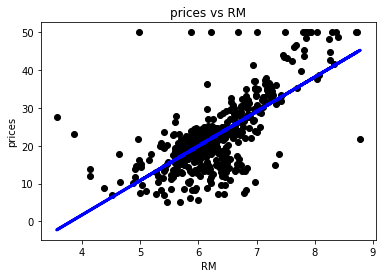

In [268]:
# plotting fitted line
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(RM, prices, color='black')
plt.plot(RM, regress.predict(RM), color='blue', linewidth=3)
plt.title('prices vs RM')
plt.ylabel('prices')
plt.xlabel('RM')

In [269]:
print ("coefficients: %s\nintercept: %0.3f" % \
(regress.coef_,regress.intercept_))

coefficients: [ 9.10210898]
intercept: -34.671


In [270]:
X = dataset["RM"]
y = dataset["MEDV"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 20 Jan 2018   Prob (F-statistic):           2.49e-74
Time:                        18:01:26   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [317]:
X = dataset[["RM","LSTAT"]]
y = dataset["MEDV"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sat, 20 Jan 2018   Prob (F-statistic):          7.01e-112
Time:                        18:14:38   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Interpreting the Output R-squared

 We can see here that this model has a much higher R-squared value — 0.639, meaning that this model explains 64% of the variance in our dependent variable. Whenever we add variables to a regression model, R² will be higher. 
This was the example of both single and multiple linear regression in Statsmodels. We could have used as little or as many variables we wanted in our regression model(s) — ( up to all the 13 attributes:  R-squared value = 0.770.

In [318]:
# Split-out validation dataset
validation_size = 0.20
seed = 7
X_trai, X_tes, Y_trai, Y_tes = train_test_split(X, y, test_size=validation_size, random_state=seed)


In [319]:
print("Training feature set size:",X_trai.shape)
print("Test feature set size:",X_tes.shape)
print("Training variable set size:",Y_trai.shape)
print("Test variable set size:",Y_tes.shape)

Training feature set size: (404, 3)
Test feature set size: (102, 3)
Training variable set size: (404,)
Test variable set size: (102,)


In [320]:
regr = LinearRegression()
regr.fit(X_trai, Y_trai)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [322]:
print ("coefficients: %s\nintercept: %0.3f" % \
(regr.coef_,regr.intercept_))

coefficients: [ 0.          6.16403899 -0.55371597]
intercept: -9.064


In [323]:
# make predictions on the testing set

y_predic = reg.predict(X_tes)


In [324]:
# function to calculate r-squared

print ("R2 Squared : ", r2_score(y_predic, Y_tes))

R2 Squared :  0.0706652731802
